##(EDA)

The purpose of this project is to provide insights to better understand customer requirements and  help developers promote their products. The dataset is selected by Kaggle. These are 10,000 Play Store apps for analyzing the Android market. This dataset contains details about different applications and  different user ratings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pusparnachakraborty","key":"4ea25276a7fb804d143204ae7ac98bbd"}'}

In [3]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 2.8 MB/s 


In [4]:
dataset_url = 'https://www.kaggle.com/lava18/google-play-store-apps'

In [5]:
import opendatasets as od
od.download(dataset_url)

100%|██████████| 1.94M/1.94M [00:00<00:00, 136MB/s]

In [6]:
df=pd.read_csv('google-play-store-apps/googleplaystore.csv')

Checking number of rows and column

In [7]:
df.shape

(10841, 13)

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Descriptive statistics

In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Ratings on the Google Play Store are typically within the  5 limit.

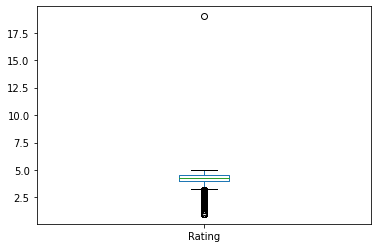

In [12]:
df.plot.box()

As you can see, there is a maximum rating of 19. It works like an outlier because all other values ​​are within the  5 limit.

In [13]:
outL=df[df['Rating'] >5]
outL

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Removing 10472 due to data mismatch in the column

In [14]:
df.drop(df.index[10472], inplace=True)

In [16]:
df.shape

(10840, 13)

In [17]:
pd.unique(df['Size'])

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Converting KB to MB 

In [18]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [19]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [20]:
df.describe()

,Rating,Size
count,9366.000000,9145.000000
mean,4.191757,21.516530
std,0.515219,22.588748
min,1.000000,0.008500
25%,4.000000,4.900000
50%,4.300000,13.000000
75%,4.500000,30.000000
max,5.000000,100.000000


Removing '+' from the values of number of installs and converting it to numeric


In [21]:
df['Installs']=df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10840, dtype: object

Removing ' , ' from the values of number of installs and converting it to numeric

In [22]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace(',',''))

In [23]:
df.describe()

,Rating,Size,Installs
count,9366.000000,9145.000000,1.084000e+04
mean,4.191757,21.516530,1.546434e+07
std,0.515219,22.588748,8.502936e+07
min,1.000000,0.008500,0.000000e+00
25%,4.000000,4.900000,1.000000e+03
50%,4.300000,13.000000,1.000000e+05
75%,4.500000,30.000000,5.000000e+06
max,5.000000,100.000000,1.000000e+09


Removing '$' from the values of Price and converting it to numeric

In [24]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [25]:
df.describe()

,Rating,Size,Installs,Price
count,9366.000000,9145.000000,1.084000e+04,10840.000000
mean,4.191757,21.516530,1.546434e+07,1.027368
std,0.515219,22.588748,8.502936e+07,15.949703
min,1.000000,0.008500,0.000000e+00,0.000000
25%,4.000000,4.900000,1.000000e+03,0.000000
50%,4.300000,13.000000,1.000000e+05,0.000000
75%,4.500000,30.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,400.000000


As we can notice, there is a high variance as min no. of Install is 0 and max no. of Install is 1000000000. To remove this we are adding a new column to dataframe, which is the log of number of installs

In [26]:
df['log_installs'] = np.log2(df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
df.describe()

,Rating,Size,Installs,Price,log_installs
count,9366.000000,9145.000000,1.084000e+04,10840.000000,1.084000e+04
mean,4.191757,21.516530,1.546434e+07,1.027368,-inf
std,0.515219,22.588748,8.502936e+07,15.949703,NaN
min,1.000000,0.008500,0.000000e+00,0.000000,-inf
25%,4.000000,4.900000,1.000000e+03,0.000000,9.965784e+00
50%,4.300000,13.000000,1.000000e+05,0.000000,1.660964e+01
75%,4.500000,30.000000,5.000000e+06,0.000000,2.225350e+01
max,5.000000,100.000000,1.000000e+09,400.000000,2.989735e+01


Checking, if the dataframe contains any duplicate values for the same App name


In [28]:
boolean=df.duplicated().any()
boolean

True

In [29]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
                                                     ..
X-ray scanner simulator                               1
Number Counting games for toddler preschool kids      1
AX Video Player                                       1
Lose Belly Fat in 30 Days - Flat Stomach              1
Strava Training: Track Running, Cycling & Swimming    1
Name: App, Length: 9659, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [30]:
df[df['App']=='Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
1705,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
1751,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
1842,Candy Crush Saga,GAME,4.4,22429716,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
1869,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
1966,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353
3994,Candy Crush Saga,FAMILY,4.4,22419455,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,28.897353


As we can see from the above dataframe, ROBLOX app, Candy Crush Saga and others are having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(10357, 14)

Previous shape (10841, 13)
Shape after deleting duplicate rows  (10357, 14)

In [33]:
df.describe()

,Rating,Size,Installs,Price,log_installs
count,8892.000000,8831.000000,1.035700e+04,10357.000000,1.035700e+04
mean,4.187877,21.287788,1.415776e+07,1.030800,-inf
std,0.522377,22.540247,8.023955e+07,16.278625,NaN
min,1.000000,0.008500,0.000000e+00,0.000000,-inf
25%,4.000000,4.700000,1.000000e+03,0.000000,9.965784e+00
50%,4.300000,13.000000,1.000000e+05,0.000000,1.660964e+01
75%,4.500000,29.000000,1.000000e+06,0.000000,1.993157e+01
max,5.000000,100.000000,1.000000e+09,400.000000,2.989735e+01


Convertingtype of Reviews column to number

In [34]:
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace('$',''))

In [35]:
df = df.loc[df.groupby(['App'])['Reviews'].idxmax()]

In [36]:
df.describe()

,Rating,Reviews,Size,Installs,Price,log_installs
count,8196.000000,9.659000e+03,8431.000000,9.659000e+03,9659.000000,9659.000000
mean,4.173267,2.168041e+05,20.398468,7.798170e+06,1.097231,-inf
std,0.536253,1.831430e+06,21.828603,5.376973e+07,16.851618,NaN
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,-inf
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000,9.965784
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000,16.609640
75%,4.500000,2.945350e+04,28.000000,1.000000e+06,0.000000,19.931569
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,29.897353


What are the top 20 apps present in the google play store as per their Genres?

In [42]:
top_genres = df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
...,...,...
113,Arcade;Pretend Play,1
114,Entertainment;Education,1
115,Adventure;Brain Games,1
116,Racing;Pretend Play,1


In [43]:
genres_installs= df.groupby(['Genres'])[['Installs']].sum()
genres_installs

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,53020500
Adventure,296695320
Adventure;Action & Adventure,106150000
Adventure;Brain Games,100000
...,...
Video Players & Editors,3916902720
Video Players & Editors;Creativity,5000000
Video Players & Editors;Music & Video,15000000


In [45]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs


,Genres,Count,Installs
0,Tools,828,8092771915
1,Entertainment,561,3014714684
2,Education,510,262910148
3,Business,420,697164865
4,Medical,395,38293077
5,Personalization,376,1532494782
6,Productivity,374,5793091369
7,Lifestyle,368,493823539
8,Finance,345,455348734
9,Sports,331,1412474498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


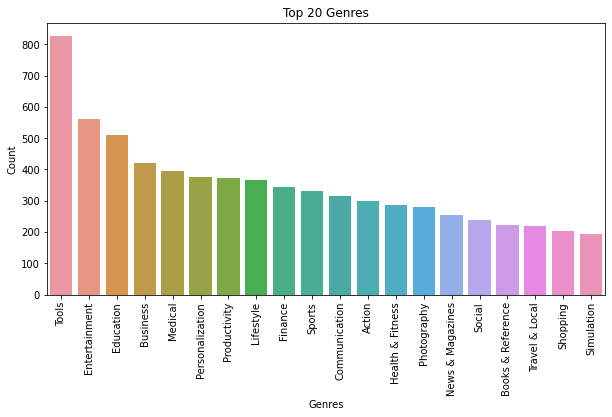

In [67]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

Which are the Genres that are getting installed the most in top 20 Genres?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


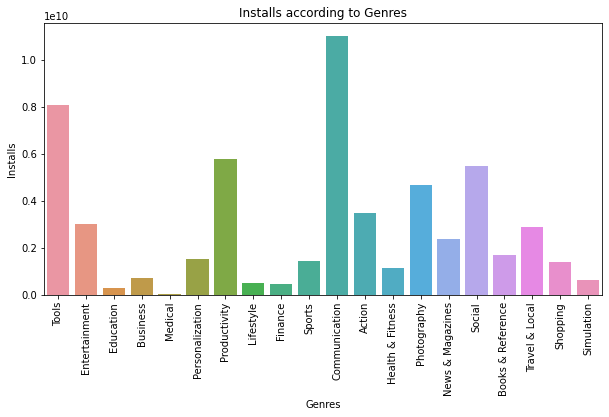

In [66]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

As you can see from the  two figures above, the maximum number of apps that exist in the Google Play store falls into the genres of tools, entertainment and education, but according to the installation and requirements of the market chart, the scenarios are not the same. The maximum number of installed apps can be found in Communications, Tools, Productivity Genres.

#Average rating

In [55]:
genres_ratings_df = df.groupby(['Genres'])[['Rating']].mean()
genres_ratings_df

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.044898
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


In [56]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
genres_installs_ratings

,Genres,Count,Installs,Rating
0,Tools,828,8092771915,4.039638
1,Entertainment,561,3014714684,4.083439
2,Education,510,262910148,4.290909
3,Business,420,697164865,4.098479
4,Medical,395,38293077,4.165862
...,...,...,...,...
113,Arcade;Pretend Play,1,1000000,4.500000
114,Entertainment;Education,1,1000000,4.400000
115,Adventure;Brain Games,1,100000,4.600000
116,Racing;Pretend Play,1,1000000,4.500000


#Highest and lowest rated Genres

In [57]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [61]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

lowest_rated_genres

,Genres,Count,Installs,Rating
17,Travel & Local,218,2894787146,4.069355
23,Video Players & Editors,162,3916902720,4.044898
0,Tools,828,8092771915,4.039638
43,Trivia,38,128606370,4.039286
24,Maps & Navigation,131,503281890,4.036441
83,Board;Action & Adventure,3,6005000,4.033333
88,Video Players & Editors;Music & Video,2,15000000,4.000000
108,Lifestyle;Pretend Play,1,10000000,4.000000
90,Entertainment;Pretend Play,2,6000000,4.000000
21,Dating,170,140925107,3.980451


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


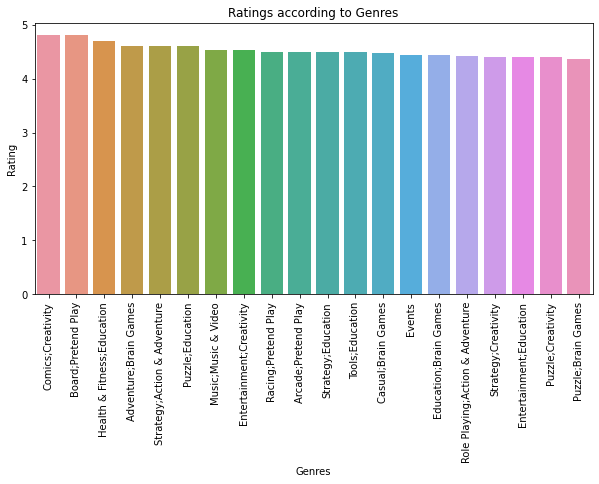

In [63]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


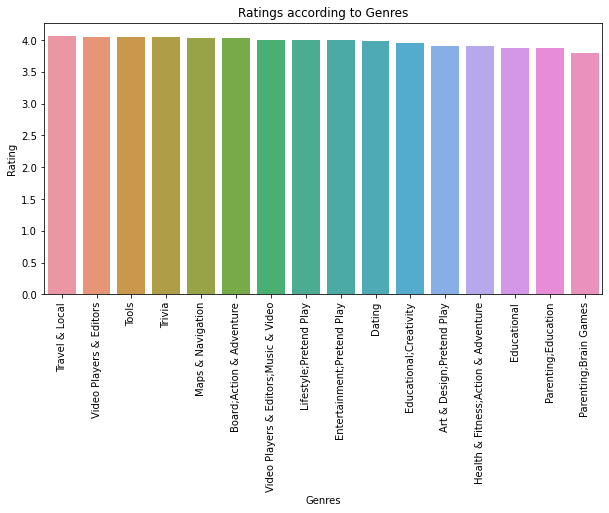

In [65]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

What are the count of applications in each category differentiated by their type?

In [68]:
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [69]:
app_count


,Category,Type,Count
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,160
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [71]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,58.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,5.0
8,EDUCATION,104.0,3.0
9,ENTERTAINMENT,85.0,2.0


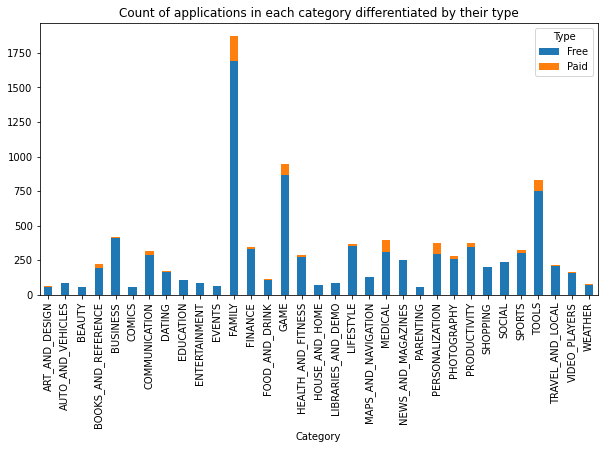

In [72]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It seems that you can download more free apps in certain app categories than in other categories. With our dataset, you can install most apps in the Family, Food & Drinks, Tools and Social categories for free. At the same time, most of the paid apps were available for download in the  Family, Sports, Tools and Medical categories.

#How many apps were installed according to its type?

In [79]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,113222100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060
59,VIDEO_PLAYERS,Free,3931831720
60,VIDEO_PLAYERS,Paid,71000
61,WEATHER,Free,360288520


In [81]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])
categoty_type_installs['log_Installs']

0     26.754580
1     13.965784
2     25.661667
3     15.613962
4     24.696947
        ...    
58    17.481957
59    31.872554
60    16.115531
61    28.424577
62    19.631120
Name: log_Installs, Length: 63, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


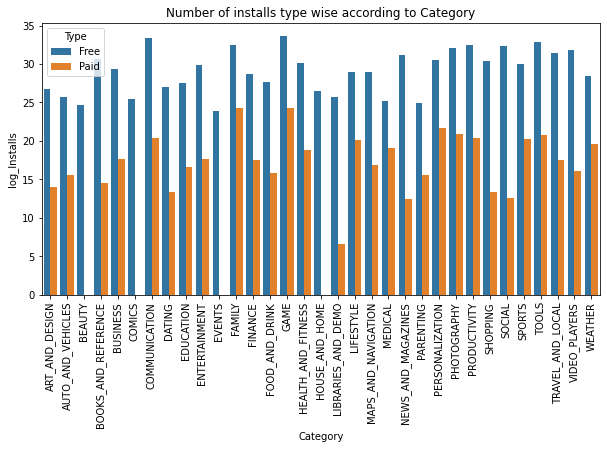

In [82]:

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

Therefore, we can conclude that the number of free applications that users install is higher than that of paid applications.

#How does size impact on the number of installs of any application?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


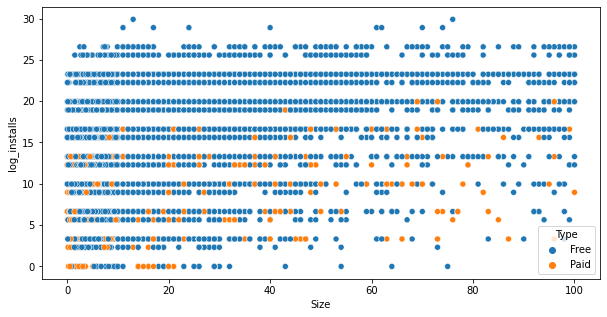

In [84]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Size'], df['log_installs'], hue=df['Type'])
plt.show()

It is obvious from the above referred to plot that size can also additionally effect the range of installations. Bulky programs are much less installed by the user.

#Histogram of log installs

In [87]:
df.loc[df['log_installs']==df['log_installs'].min(),'log_installs']=0

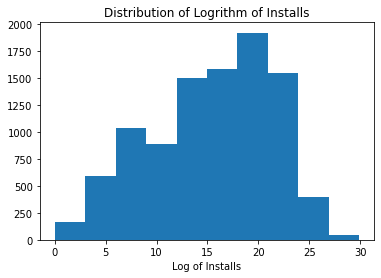

In [88]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs")
plt.hist(df['log_installs']);

#Histogram of size

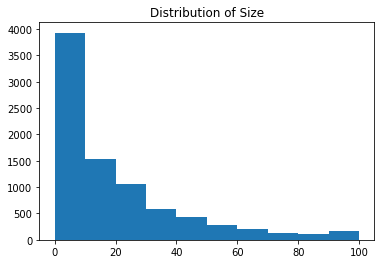

In [89]:
plt.title("Distribution of Size")
plt.hist(df['Size']);
plt.show()

From the histogram above, we can conclude that the maximum number of applications present in the dataset is small in size.

In [90]:
reviews_df = pd.read_csv('google-play-store-apps/googleplaystore_user_reviews.csv')

##Merging dataframes on apps

In [92]:
merged_df = df.merge(reviews_df, on="App")
merged_df 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,18.931569,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61551,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,NaN,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61552,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,NaN,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61553,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,NaN,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN
61554,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,NaN,10000000,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,23.253497,NaN,NaN,NaN,NaN


#What is the distribution of type of reviews in the dataset?

In [93]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [94]:
category_sentiment

,Category,Sentiment,Sentiment Count
0,ART_AND_DESIGN,Negative,47
1,ART_AND_DESIGN,Neutral,58
2,ART_AND_DESIGN,Positive,233
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36
...,...,...,...
94,VIDEO_PLAYERS,Neutral,58
95,VIDEO_PLAYERS,Positive,190
96,WEATHER,Negative,28
97,WEATHER,Neutral,31


In [95]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


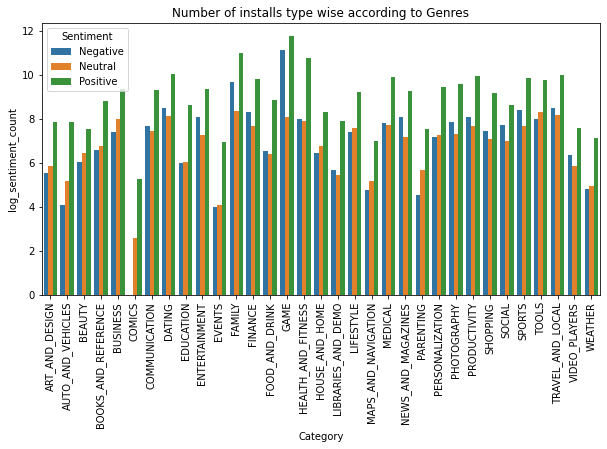

In [97]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

#Histogram of subjectivity

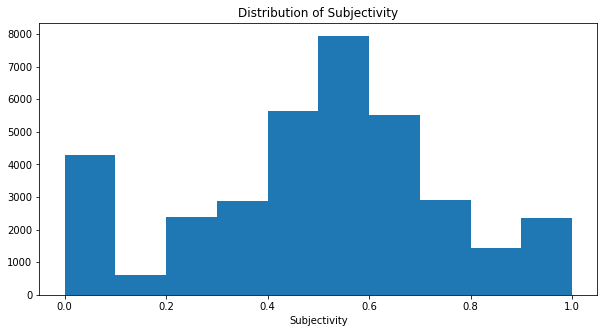

In [99]:
plt.figure(figsize=(10,5))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

We find that the maximum number of sentimental subjects is between 0.4 and 0.7. From this, we can conclude that the maximum number of users rated the application based on their experience.

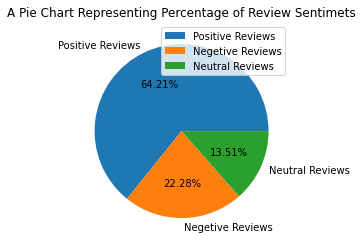

In [102]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.pie(counts,labels=labels,autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets')
plt.legend()
plt.show()
